## Step 1: Acquire Data
### Explore Problem
1. Find 3 Descriptive Analytics that might be useful to be known
2. Try to show one Diagnostic Analytics to clarify some tren in Descriptive Analytics

#### Descriptive Analytics
1. Bagaimana tren pekerjaan (job title) yang ada / terjadi tiap tahun?
2. Bagaimana tren gaji yang terjadi untuk setiap jenis pekerjaan
3. Bagaimana tren salary yang terjadi pada setiap jenis pekerjaan (job title) berdasarkan tingkat employmentnya (pada tahun 2020 s.d 2022)

#### Diagnostic Analytics
<p style='text-align: justify;'>Mengapa job title (X: ditentukan setelah melihat tren jenis pekerjaan dalam Descriptive Analytics) memiliki minat paling banyak? apakah gaji tinggi pada tingkat entry level mempengaruhi banyaknya jumlah employee pada job title (X: ditentukan setelah melihat tren jenis pekerjaan dalam Descriptive Analytics)?</p>

### Identify Data
1. The data that will be use is from [Salary Data]('https://drive.google.com/file/d/1IGl3WjMH22V_vqWo5RUc3d6CDiJv8c_6/view')
2. The description of the data can be read from [Data Description]('https://docs.google.com/document/d/1sxJuMd6yK6BxNp1JIhAU8Twpb3XCzBToLfcyNgaoKd8/edit')

### Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('salary_dataset.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Developer,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Developer,150000,USD,150000,US,50,US,L


#### Showing initial data shape

In [4]:
data.shape

(607, 11)

```NOTE```: Data has 607 entry rows and 11 columns

#### Check column names and statistics of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
data['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [8]:
data['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

```NOTE```
1. There are 4 numeric columns:
    - work year
    - salary
    - salary_in_usd
    - remote ratio
2. work_year is the year the salary was paid : ```2020```,```2021```, and ```2022```
3. On the descriptive statistics above we know roughly the maximum salary was ```600,000 USD``` and the mean salary was around ```112,298 USD```

## Step 2: Prepare Data
### Explore Data
- Check if there any missing value

In [9]:
# check if data has missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

```NOTE```:
- The data is already clean, so we dont need to clean the data 

### Visualize Ideas
#### Find some descriptive statistics of the data
- This is used to get an ideas of the dataset
- Find trends on dataset as many as possible
#### Histogram plot to see the distribution of dataset

<AxesSubplot:ylabel='Frequency'>

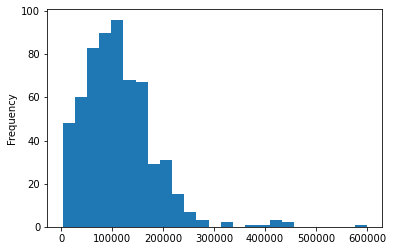

In [10]:
data['salary_in_usd'].plot.hist(bins=25)

```NOTE```
- The average salary of employee in data field industry is around <b>50,000 - 150,000 USD</b>

#### Boxplot visualization to see an outlier in dataset

<AxesSubplot:>

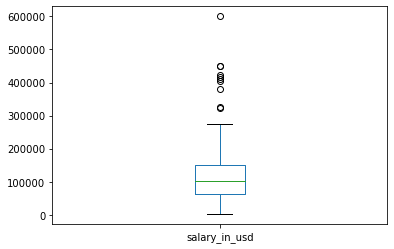

In [11]:
data['salary_in_usd'].plot.box()

```NOTE```
- From the boxplot above we know the median of salary is around <b>101,000 USD</b> with <i><b>average salary</b></i> on <b>112,000 USD</b>
- There are seems like an outliers in salary, but we can considered the value is represented as the highest salary was paid for senior level experience employee

#### Scatter plot visualization to see relationship/correlation between two variables

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

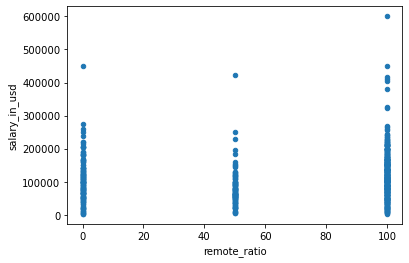

In [12]:
data.plot.scatter(x='remote_ratio', y='salary_in_usd')

```NOTE```
- The distribution more like discrete, because the remote ratio values were discrete
- We can tell there's no significan difference between employee that had 100 remote work and employee with 0 remote work

<AxesSubplot:xlabel='salary', ylabel='salary_in_usd'>

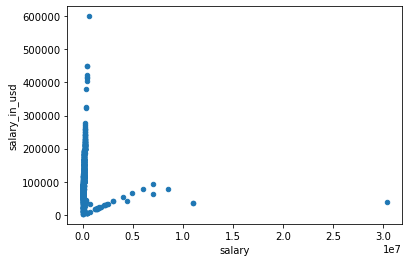

In [13]:
data.plot.scatter(x='salary', y='salary_in_usd')

```NOTE```
- From the figure above, most employee are paid with USD than other countries currencies

#### Line plot visualization to see some trend happen in the dataset

In [14]:
data_by_explevel = data[data['experience_level'] == 'EN']
data_by_explevel.groupby(['work_year', 'job_title'])['salary_in_usd'].sum().unstack()

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Developer
work_year,,,,
2020,279072,182397,423503,388000
2021,472830,390297,1231954,682667
2022,239000,648176,417541,69175


<AxesSubplot:xlabel='work_year'>

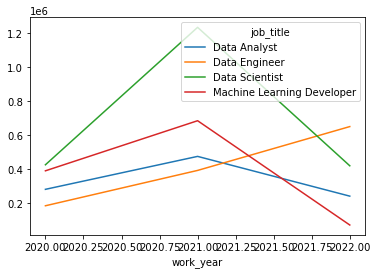

In [15]:
data_by_explevel.groupby(['work_year', 'job_title'])['salary_in_usd'].sum().unstack().plot()

In [59]:
data_by_explevel.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack()

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Developer
work_year,,,,
2020,55814.400000,45599.250000,47055.888889,194000.000
2021,52536.666667,43366.333333,58664.476190,85333.375
2022,59750.000000,72019.555556,69590.166667,34587.500


<AxesSubplot:xlabel='work_year'>

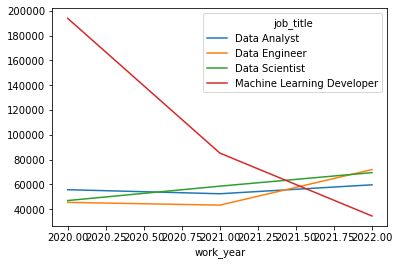

In [60]:
data_by_explevel.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack().plot()

```NOTE```
- Entry level employee in Data Engineer has a salary increase every year compared to others job title

### Transforming Dataset
- Make sure each columns has correct data types
- Changing index to date index (year)

#### Change data type on columns salary and salary in usd

In [16]:
data['salary'] = data['salary'].astype(float)
data['salary_in_usd'] = data['salary_in_usd'].astype(float)

In [17]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000.0,EUR,79833.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Developer,260000.0,USD,260000.0,JP,0,JP,S
2,2020,SE,FT,Data Engineer,85000.0,GBP,109024.0,GB,50,GB,M
3,2020,MI,FT,Data Analyst,20000.0,USD,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Developer,150000.0,USD,150000.0,US,50,US,L


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    float64
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    float64
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 52.3+ KB


```NOTE```
- Now the data types on column ```salary``` and ```salary_in_usd``` has changed to float

#### Change index to date time (year)

In [19]:
data['work_year'] = pd.to_datetime(data['work_year'], format='%Y')

In [20]:
data.set_index('work_year', inplace=True)
data = data.sort_index()
data.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,
2020-01-01,MI,FT,Data Scientist,70000.0,EUR,79833.0,DE,0,DE,L
2020-01-01,SE,FT,Machine Learning Developer,260000.0,USD,260000.0,JP,0,JP,S
2020-01-01,SE,FT,Data Engineer,85000.0,GBP,109024.0,GB,50,GB,M
2020-01-01,MI,FT,Data Analyst,20000.0,USD,20000.0,HN,0,HN,S
2020-01-01,SE,FT,Machine Learning Developer,150000.0,USD,150000.0,US,50,US,L


```NOTE```

## Step 3: Analyze Data
### Descriptive Analytics
1. Bagaimana tren pekerjaan (job title) yang terjadi tiap tahun (<b>done</b>)
2. Bagaimana tren salary yang terjadi untuk setiap jenis pekerjaan
3. Bagaimana tren salary yang terjadi untuk setiap pekerjaan (job title) berdasarkan tingkat employement pada tiap tahun
    - Tren salary pada tahun 2020
    - Tren salary pada tahun 2021
    - Tren salary pada tahun 2022


#### 1. Bagaimana tren pekerjaan (job title) yang terjadi tiap tahun?

In [21]:
# Trend general salary in data job
data.groupby(data.index.year)['salary_in_usd'].sum()

work_year
2020     6898536.0
2021    21668273.0
2022    39597998.0
Name: salary_in_usd, dtype: float64

In [22]:
# Trend salary for each job title every year
data.groupby([data.index.year, 'job_title'])['salary_in_usd'].sum()

work_year  job_title                 
2020       Data Analyst                    764903.0
           Data Engineer                  1658955.0
           Data Scientist                 3420445.0
           Machine Learning Developer     1054233.0
2021       Data Analyst                   3908420.0
           Data Engineer                  7020582.0
           Data Scientist                 8057869.0
           Machine Learning Developer     2681402.0
2022       Data Analyst                   9472472.0
           Data Engineer                 13336370.0
           Data Scientist                13544038.0
           Machine Learning Developer     3245118.0
Name: salary_in_usd, dtype: float64

In [23]:
# Trend how much employee in each job title every year
data.groupby([data.index.year, 'job_title']).count()

experience_level  employment_type  \
work_year job_title                                                       
2020      Data Analyst                              13               13   
          Data Engineer                             20               20   
          Data Scientist                            31               31   
          Machine Learning Developer                 8                8   
2021      Data Analyst                              38               38   
          Data Engineer                             65               65   
          Data Scientist                            88               88   
          Machine Learning Developer                26               26   
2022      Data Analyst                              89               89   
          Data Engineer                            106              106   
          Data Scientist                            95               95   
          Machine Learning Developer                28               28   

                                      salary  salary_currency  salary_in_usd  \
work_year job_title                                                            
2020      Data Analyst                    13               13             13   
          Data Engineer                   20               20             20   
          Data Scientist                  31               31             31   
          Machine Learning Developer       8                8              8   
2021      Data Analyst                    38               38             38   
          Data Engineer                   65               65             65   
          Data Scientist                  88               88             88   
          Machine Learning Developer      26               26             26   
2022      Data Analyst                    89               89             89   
          Data Engineer                  106              106            106   
          Data Scientist                  95               95             95   
          Machine Learning Developer      28               28             28   

                                      employee_residence  remote_ratio  \
work_year job_title                                                      
2020      Data Analyst                                13            13   
          Data Engineer                               20            20   
          Data Scientist                              31            31   
          Machine Learning Developer                   8             8   
2021      Data Analyst                                38            38   
          Data Engineer                               65            65   
          Data Scientist                              88            88   
          Machine Learning Developer                  26            26   
2022      Data Analyst                                89            89   
          Data Engineer                              106           106   
          Data Scientist                              95            95   
          Machine Learning Developer                  28            28   

                                      company_location  company_size  
work_year job_title                                                   
2020      Data Analyst                              13            13  
          Data Engineer                             20            20  
          Data Scientist                            31            31  
          Machine Learning Developer                 8             8  
2021      Data Analyst                              38            38  
          Data Engineer                             65            65  
          Data Scientist                            88            88  
          Machine Learning Developer                26            26  
2022      Data Analyst                              89            89  
          Data Engineer                         

In [24]:
# Create new DataFrame cantain number of employee for each job title every year
df_employee = data.groupby([data.index.year, 'job_title']).count()

# The value of experience level is equal the number of employee 
df_employee = df_employee['experience_level']

<AxesSubplot:title={'center':'Number of Employee in Data Field Industry 2020 - Q1 2022'}, xlabel='work_year', ylabel='Number of Employee'>

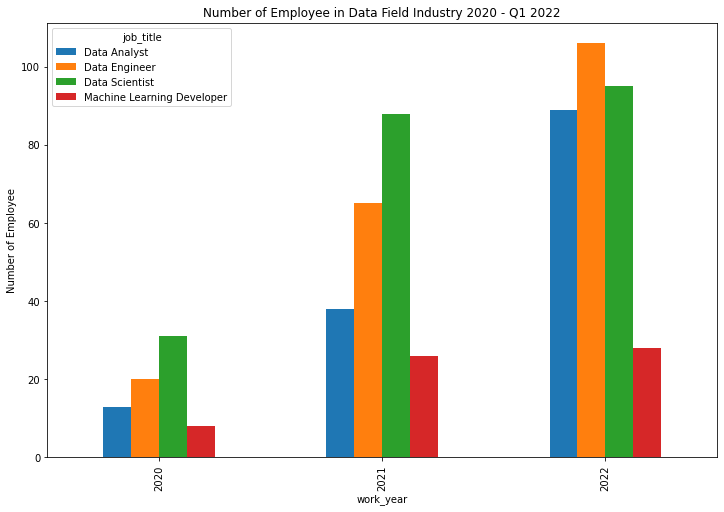

In [25]:
df_employee.unstack().plot.bar(figsize=(12,8), ylabel= 'Number of Employee', title='Number of Employee in Data Field Industry 2020 - Q1 2022')

In [26]:
df_employee.unstack()

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Developer
work_year,,,,
2020,13,20,31,8
2021,38,65,88,26
2022,89,106,95,28


```NOTE```

#### 2. Bagaimana tren salary yang terjadi untuk setiap jenis pekerjaan?

In [27]:
data.groupby([data.index.year, 'job_title'])['salary_in_usd'].sum()

work_year  job_title                 
2020       Data Analyst                    764903.0
           Data Engineer                  1658955.0
           Data Scientist                 3420445.0
           Machine Learning Developer     1054233.0
2021       Data Analyst                   3908420.0
           Data Engineer                  7020582.0
           Data Scientist                 8057869.0
           Machine Learning Developer     2681402.0
2022       Data Analyst                   9472472.0
           Data Engineer                 13336370.0
           Data Scientist                13544038.0
           Machine Learning Developer     3245118.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:title={'center':'Salary of Employee in Data Field Industry on 2020 - Q1 2022'}, xlabel='work_year', ylabel='Salary (in million)'>

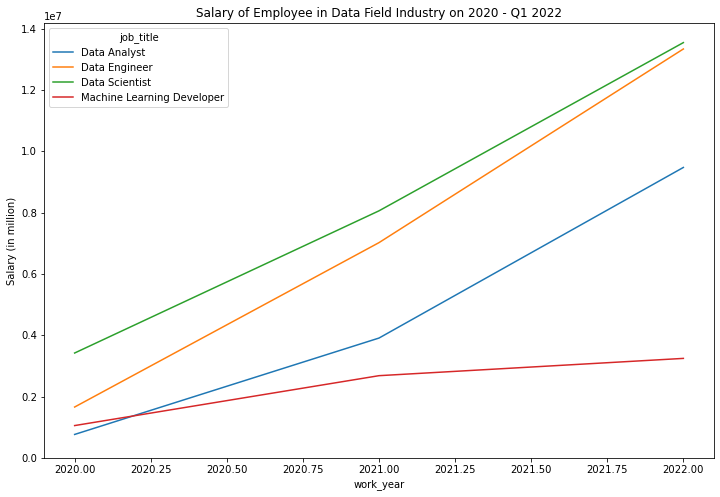

In [28]:
data.groupby([data.index.year, 'job_title'])['salary_in_usd'].sum().unstack().plot(ylim=0, figsize=(12,8), ylabel='Salary (in million)', title='Salary of Employee in Data Field Industry on 2020 - Q1 2022')

<AxesSubplot:title={'center':'Ratio of Employee Salary in Data Field Industry on 2020 - Q1 2022'}, xlabel='work_year', ylabel='Salary (in million)'>

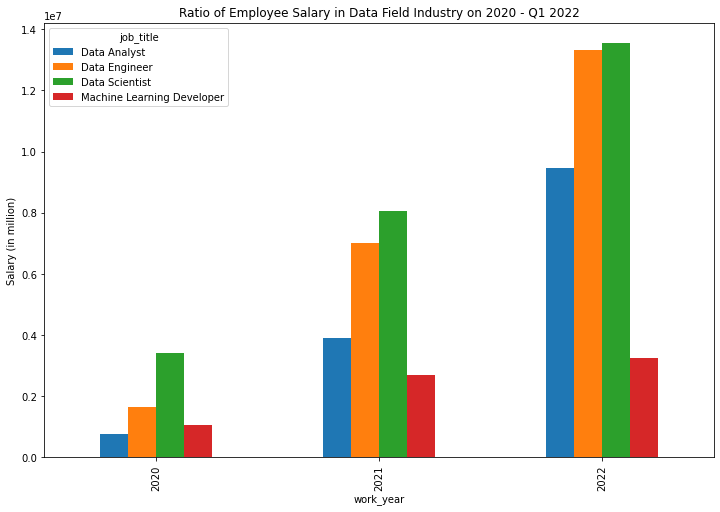

In [29]:
data.groupby([data.index.year, 'job_title'])['salary_in_usd'].sum().unstack().plot.bar(figsize=(12,8), ylabel='Salary (in million)', title='Ratio of Employee Salary in Data Field Industry on 2020 - Q1 2022')

```NOTE```

#### 3. Bagaimana tren salary yang terjadi pada setiap jenis pekerjaan (job title) berdasarkan tingkat employmentnya

In [30]:
df_exp_level = data.groupby(['job_title', 'experience_level'])['salary_in_usd'].sum().unstack()
df_exp_level = df_exp_level.reindex(columns=['EN', 'MI', 'SE', 'EX'])
df_exp_level

experience_level,EN,MI,SE,EX
job_title,,,,
Data Analyst,990902.0,3338545.0,8651348.0,1165000.0
Data Engineer,1220870.0,6056608.0,12958409.0,1780020.0
Data Scientist,2072998.0,7293482.0,13495738.0,2160134.0
Machine Learning Developer,1139842.0,2054525.0,3707347.0,79039.0


<AxesSubplot:xlabel='job_title'>

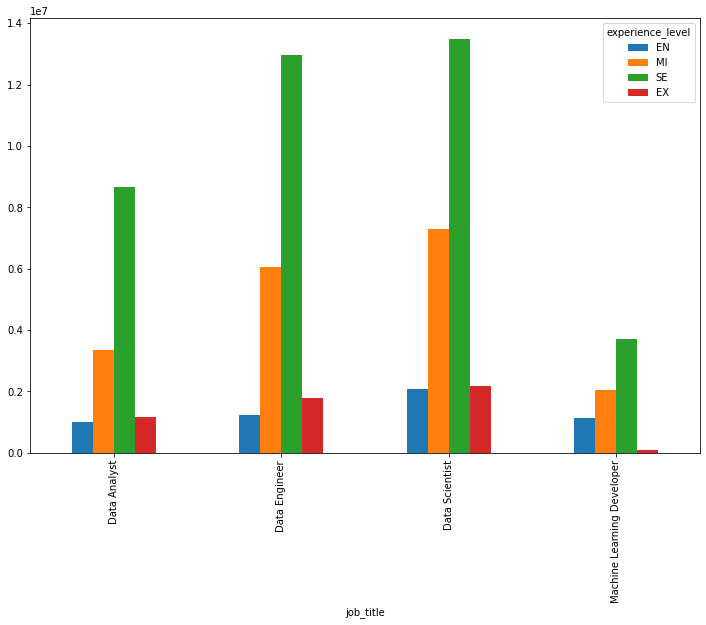

In [31]:
df_exp_level.plot.bar(figsize=(12,8))

```NOTE```

<AxesSubplot:title={'center':'Ratio of Employee Salary based on Experience Level'}, ylabel='salary (in million USD)'>

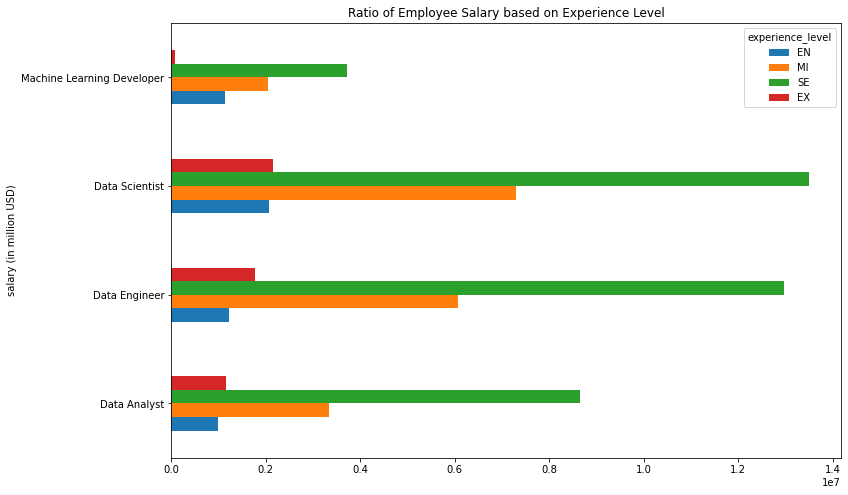

In [32]:
df_exp_level.plot.barh(figsize=(12,8), xlabel='salary (in million USD)', title='Ratio of Employee Salary based on Experience Level')

```NOTE```

In [33]:
# Put note here

### Diagnostic Analytics
- <p style='text-align: justify;'>Mengapa job title <b>Data Scientist</b> memiliki <b><i>jumlah salary paling banyak?</i></b> sedangkan <b><i>kenaikan jumlah employee</i></b> paling tinggi ada pada job title <b>Data Engineer</b>, Bagaimana pengaruh <b>average salary</b> terhadap tinggi rendahnya jumlah employee pada suatu job title ?</p>

In [34]:
df_ml = data[data['job_title'] == 'Machine Learning Developer']
df_da = data[data['job_title'] == 'Data Analyst']
df_de = data[data['job_title'] == 'Data Engineer']
df_ds = data[data['job_title'] == 'Data Scientist']

#### Analysis comparison for Data Scientist

In [35]:
datasetds_by_company = df_ds.groupby(['company_size', 'experience_level'])['salary_in_usd'].sum().unstack()

In [36]:
datasetds_by_company = datasetds_by_company.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='company_size'>

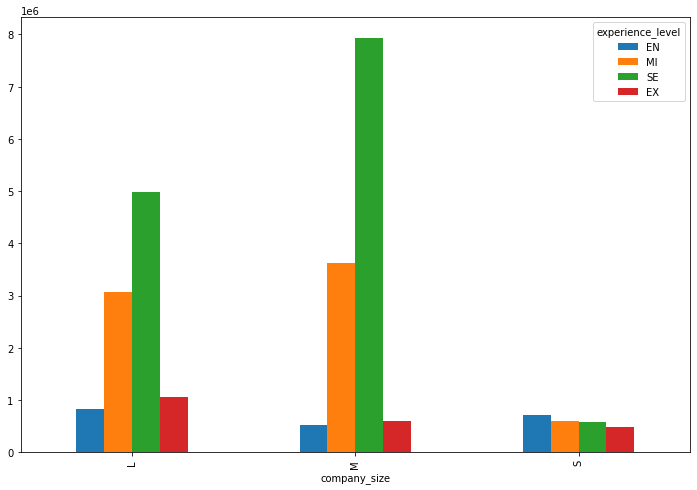

In [37]:
datasetds_by_company.plot.bar(figsize=(12,8))

In [38]:
datasetds_by_workyear = df_ds.groupby([df_ds.index.year, 'experience_level'])['salary_in_usd'].sum().unstack()
datasetds_by_workyear = datasetds_by_workyear.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='work_year'>

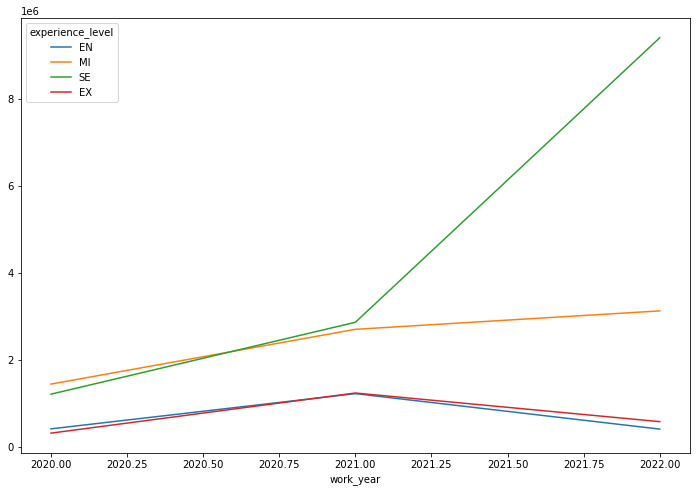

In [39]:
datasetds_by_workyear.plot(figsize=(12,8))

```NOTE```
- From the visualization above, we can tell the salary of senior level has increased every year but other experience level shows a decrease every year

<AxesSubplot:ylabel='work_year'>

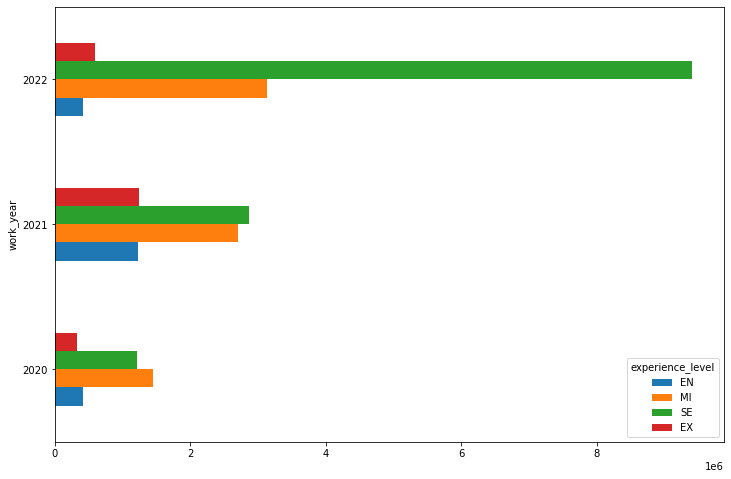

In [40]:
datasetds_by_workyear.plot.barh(figsize=(12,8))

#### Analysis comparison for Data Engineering

In [41]:
datasetde_by_company = df_de.groupby(['company_size', 'experience_level'])['salary_in_usd'].sum().unstack()
datasetde_by_company = datasetde_by_company.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='company_size'>

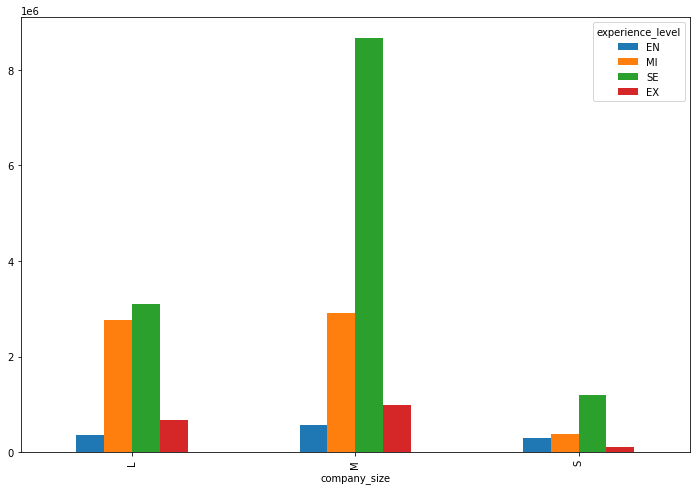

In [42]:
datasetde_by_company.plot.bar(figsize=(12,8))

In [43]:
datasetde_by_workyear = df_de.groupby([df_de.index.year, 'experience_level'])['salary_in_usd'].sum().unstack()
datasetde_by_workyear = datasetde_by_workyear.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='work_year'>

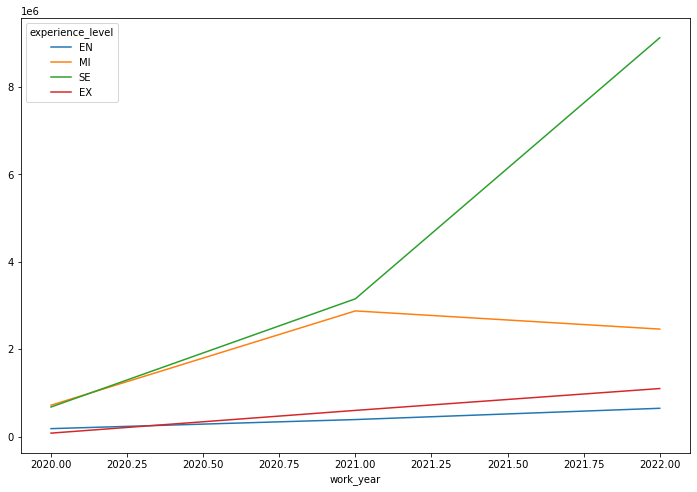

In [44]:
datasetde_by_workyear.plot(figsize=(12,8))

<AxesSubplot:ylabel='work_year'>

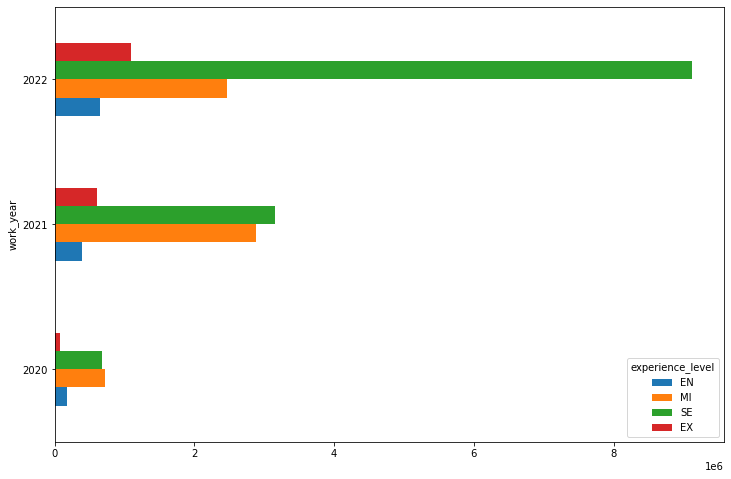

In [45]:
datasetde_by_workyear.plot.barh(figsize=(12,8))

```NOTE```
- From the visualization above we know that Data Engineering salary shows an increase in almost every experience level

In [46]:
datasetda_by_company = df_da.groupby(['company_size', 'experience_level'])['salary_in_usd'].sum().unstack()
datasetda_by_company = datasetda_by_company.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='company_size'>

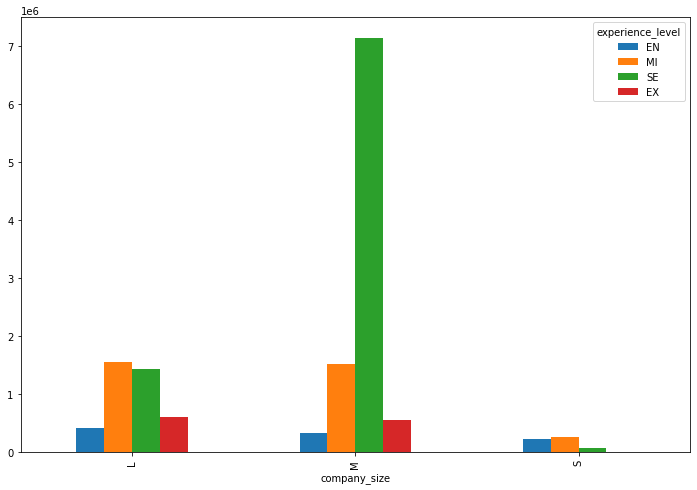

In [47]:
datasetda_by_company.plot.bar(figsize=(12,8))

In [48]:
datasetda_by_workyear = df_da.groupby([df_da.index.year, 'experience_level'])['salary_in_usd'].sum().unstack()
datasetda_by_workyear = datasetda_by_workyear.reindex(columns= ['EN', 'MI', 'SE', 'EX'])

<AxesSubplot:xlabel='work_year'>

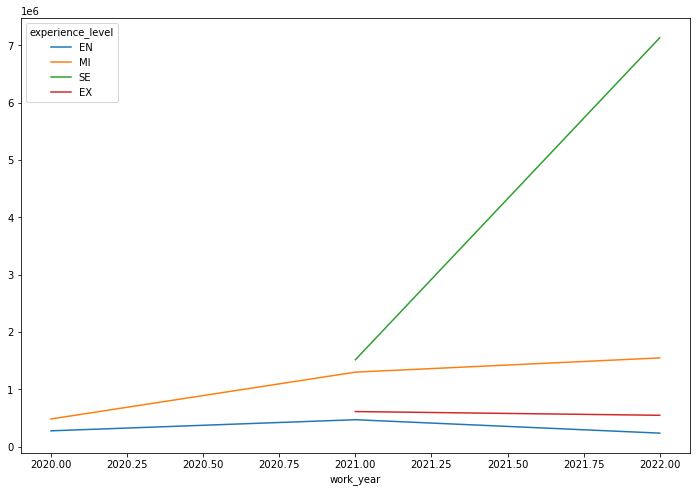

In [49]:
datasetda_by_workyear.plot(figsize=(12,8))

<AxesSubplot:ylabel='work_year'>

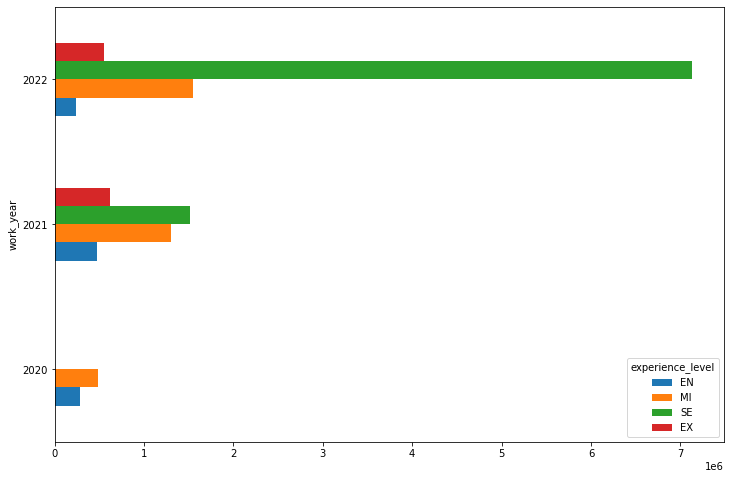

In [50]:
datasetda_by_workyear.plot.barh(figsize=(12,8))

```NOTE```
- There was some peculiarity on the line plot above, the line plot on salary for Senior Level and Executive Level between prelimenary 2020 - Q3 2021 are not shown

In [51]:
df_da.isnull()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,
2020-01-01,False,False,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False,False,False
2020-01-01,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,False,False,False,False,False,False,False,False,False,False
2022-01-01,False,False,False,False,False,False,False,False,False,False
2022-01-01,False,False,False,False,False,False,False,False,False,False


In [52]:
df_da.isnull().any()

experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [53]:
df_da[df_da['salary'] == 0]

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,


In [54]:
df_da[df_da['salary_in_usd'] == 0]

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,


In [55]:
df_da['salary'].unique()

array([2.00000e+04, 7.20000e+04, 1.35000e+05, 8.70000e+04, 8.50000e+04,
       8.00000e+03, 4.50000e+05, 9.80000e+04, 1.00000e+05, 4.10000e+04,
       1.00000e+04, 9.10000e+04, 1.50000e+05, 2.35000e+05, 8.00000e+04,
       6.70000e+04, 5.00000e+04, 1.10000e+05, 1.70000e+05, 7.50000e+04,
       1.45000e+06, 1.10000e+07, 6.20000e+04, 3.74560e+04, 9.00000e+04,
       8.76000e+03, 1.20000e+05, 2.30000e+05, 5.50000e+04, 6.00000e+04,
       4.50000e+04, 9.27200e+03, 1.40000e+05, 2.00000e+05, 9.30000e+04,
       5.40000e+04, 1.55000e+05, 1.20600e+05, 1.02100e+05, 8.49000e+04,
       9.90000e+04, 1.16000e+05, 1.06260e+05, 1.26500e+05, 9.03200e+04,
       1.24190e+05, 1.30000e+05, 1.15500e+05, 1.12900e+05, 1.67000e+05,
       1.36600e+05, 1.09280e+05, 1.75000e+05, 6.13000e+04, 5.80000e+04,
       1.32000e+05, 1.28875e+05, 9.37000e+04, 1.64000e+05, 1.45000e+05,
       1.05400e+05, 1.15934e+05, 8.16660e+04, 4.00000e+04, 3.00000e+04,
       1.40000e+06, 4.05000e+05, 9.90500e+04, 2.05300e+05, 1.847

In [56]:
df_da['salary_in_usd'].unique()

array([ 20000.,  72000., 135000.,  87000.,  85000.,   8000.,   6072.,
        98000., 100000.,  46759.,  10000.,  91000., 150000., 235000.,
        80000.,  79197.,  59102., 110000., 170000.,  88654.,  19609.,
       450000.,  75000.,  36259.,  62000.,  51519.,  90000.,  50000.,
        10354., 120000., 230000.,  55000.,  60000.,  61896.,   9272.,
       140000.,  71786., 200000.,  93000.,  63831., 102839., 155000.,
       120600., 102100.,  84900.,  99000., 116000., 106260., 126500.,
        90320., 124190., 130000., 115500., 112900., 167000., 136600.,
       109280., 175000.,  61300.,  58000., 132000., 128875.,  93700.,
       164000., 145000., 105400., 115934.,  81666.,  52351.,  39263.,
        43966.,  32974.,  18442.,  70912., 405000.,  99050., 205300.,
       184700., 116150.,  65438.,  69000., 150075., 105000., 110925.,
        45807., 150260.,  67000.,  52000., 129000.])

In [57]:
df_da.groupby([df_da.index.year, 'experience_level'])['salary'].sum()

work_year  experience_level
2020       EN                    723000.0
           MI                    924000.0
2021       EN                    453032.0
           EX                    615000.0
           MI                  13682456.0
           SE                   1468000.0
2022       EN                    239000.0
           EX                    550000.0
           MI                   2886260.0
           SE                   7133145.0
Name: salary, dtype: float64

In [58]:
df_da.groupby([df_da.index.year, 'experience_level'])['salary'].sum().unstack()

experience_level,EN,EX,MI,SE
work_year,,,,
2020,723000.0,NaN,924000.0,NaN
2021,453032.0,615000.0,13682456.0,1468000.0
2022,239000.0,550000.0,2886260.0,7133145.0


```NOTE```
- Nan value is caused by no entry of employee with executive and senior experience level on work year 2020